In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
list_t=np.arange(10000,41000,10000)

In [29]:
lx=22000 
ly = 11000

In [30]:
m_t={}
for t in list_t:
    m_t[t]=pd.read_csv("f_m_t%d.dat"%t, names=np.arange(lx), sep=' ', index_col=False, dtype=np.float64)

In [40]:
rho_t={}
for t in list_t:
    rho_t[t]=pd.read_csv("f_rho_t%d.dat"%t, names=np.arange(lx), sep=' ', index_col=False, dtype=np.float64)

In [41]:
for t in list_t:
    rho_t[t].dropna(inplace=True, axis=1)

In [42]:
for t in list_t:
    rho_t[t].columns=[str(a) for a in np.arange(rho_t[t].shape[1])]

In [43]:
for t in list_t:
    rho_t[t].to_parquet("f_rho_t%d.parquet"%t, compression='gzip')

In [54]:
prof1=(m_t[20000].values)/(rho_t[20000].values)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


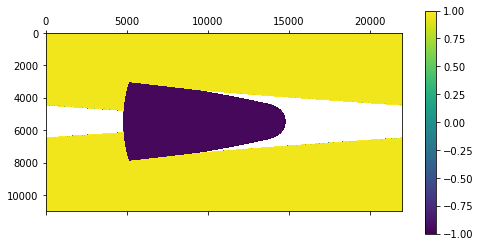

In [55]:
plt.matshow(prof1)
plt.colorbar()

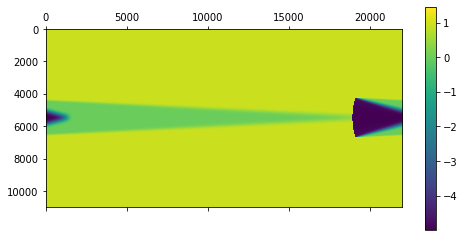

In [63]:
plt.matshow(m_t[10000].values)
plt.colorbar()

In [64]:
m_t[10000].values[5500,-1]

-4.971128

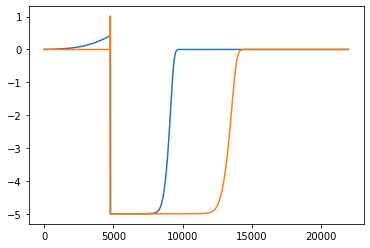

In [72]:
plt.plot(np.roll(m_t[10000].values[5500,:], 7900))
plt.plot(m_t[20000].values[5500,:])

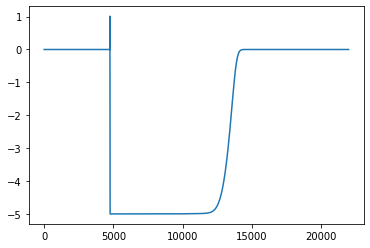

In [66]:
plt.plot(m_t[20000].values[5500,:])

In [65]:
np.savetxt("coupe_PDE_t10000.dat", m_t[10000].values[5500,:])

In [47]:
prof=np.roll(m_t[40000].values, shift=4000)/np.roll(rho_t[40000].values, shift=4000)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


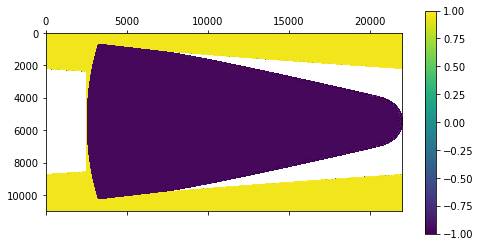

In [56]:
plt.matshow(prof)
plt.colorbar()

(5000, 10000)

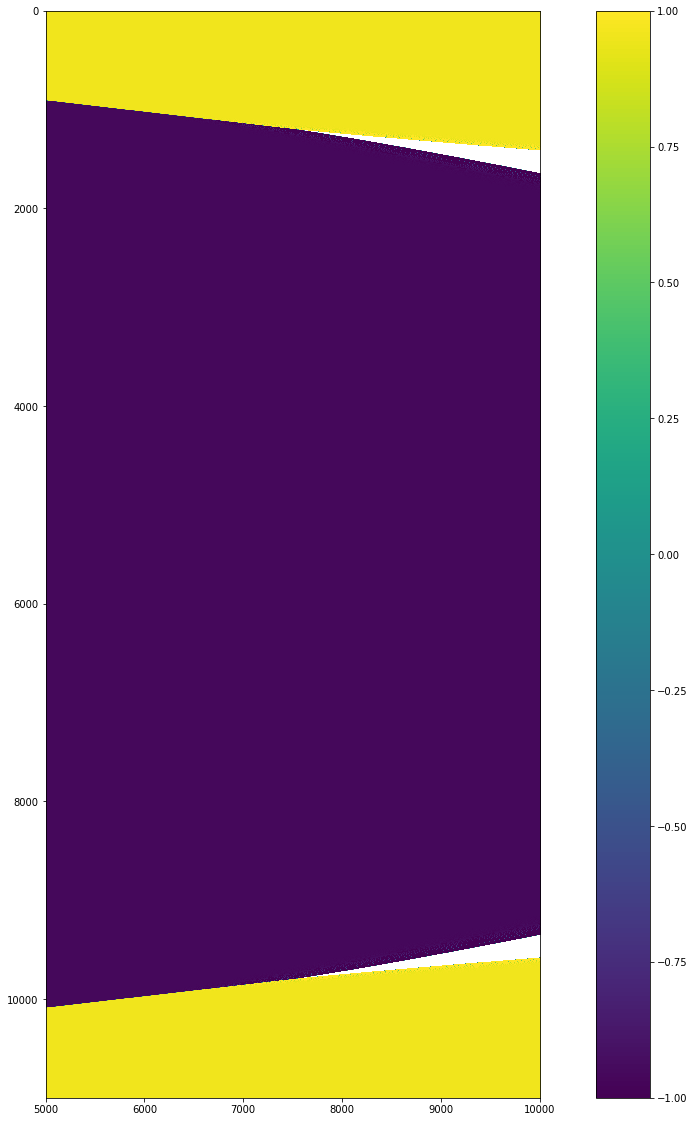

In [50]:
plt.figure(figsize=(20,20))
plt.imshow(prof)
plt.colorbar()
plt.xlim(5000,10000)